In [21]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 

# import pandas as pd

# # Select only numerical columns
# numerical_cols = X.select_dtypes(include=[np.number]).columns

# # Plot histograms
# X[numerical_cols].hist(figsize=(12, 8), bins=20)
# plt.suptitle("Histograms of Numerical Features")
# plt.show()


AttributeError: 'DataFrame' object has no attribute 'metadata'

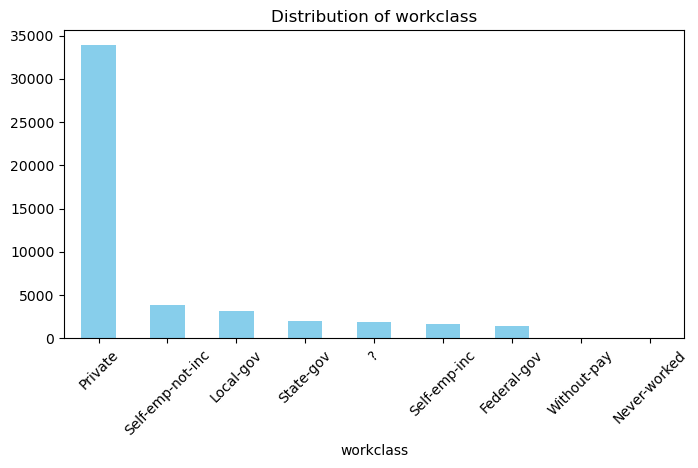

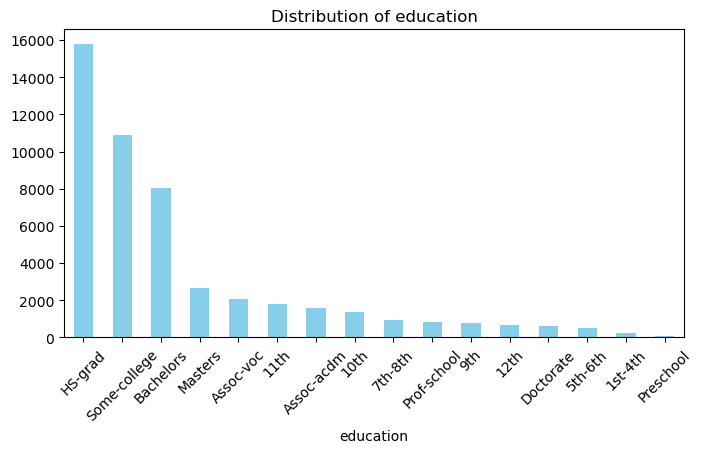

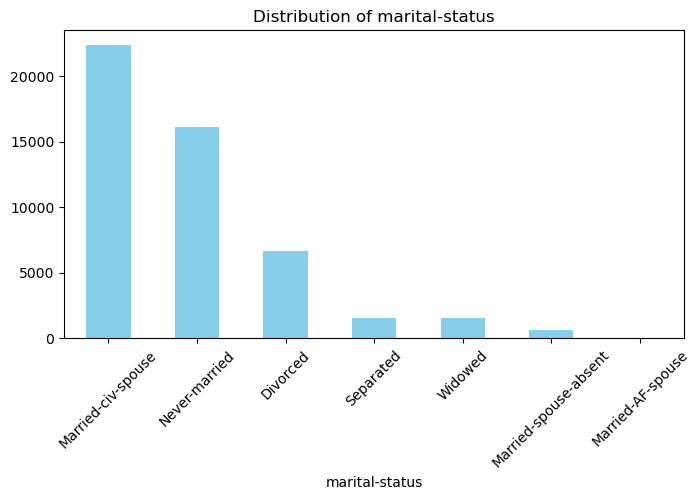

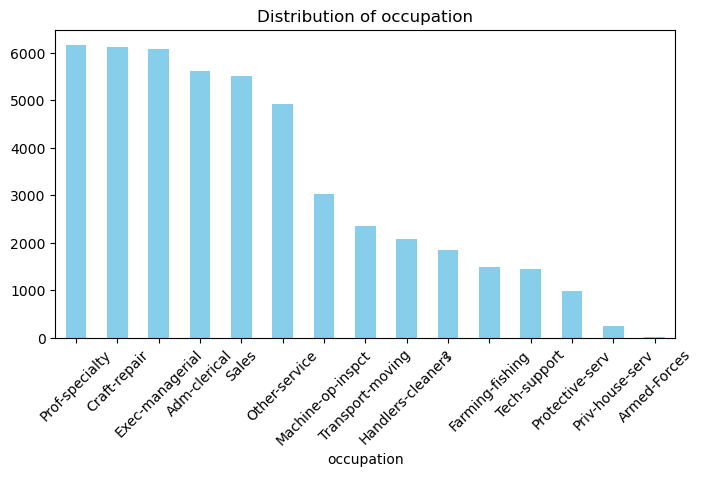

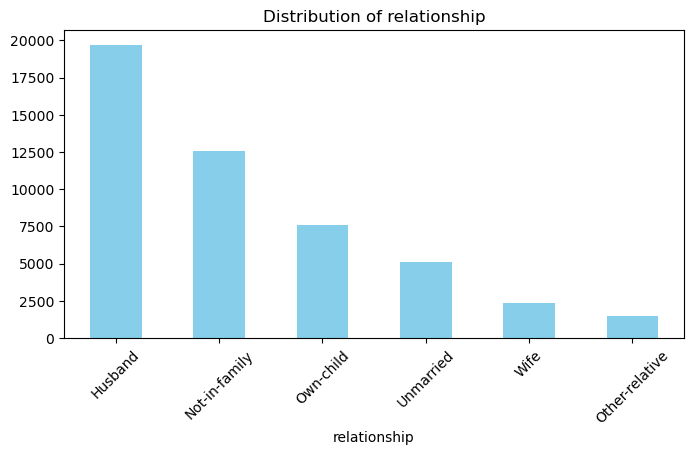

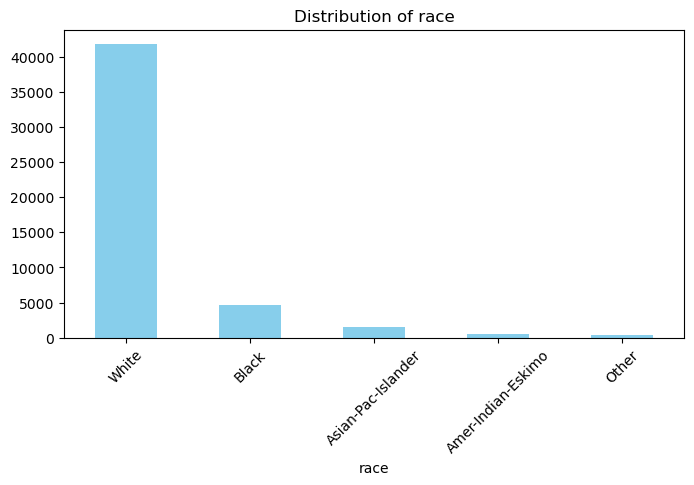

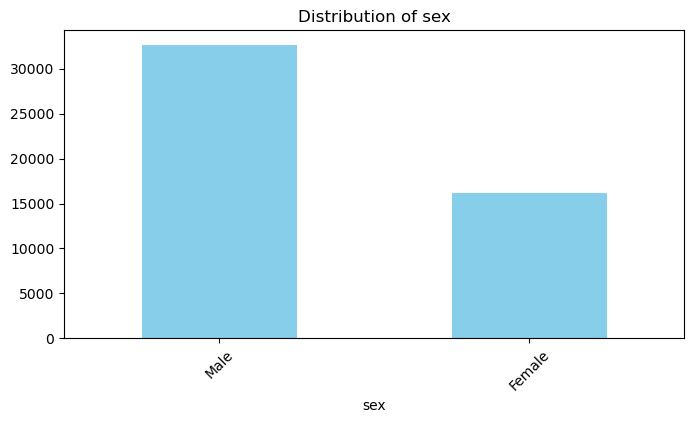

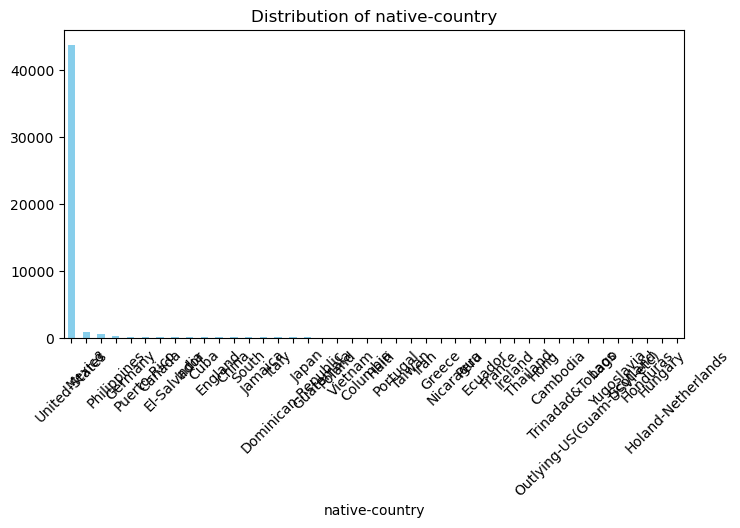

In [2]:
# Select categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Plot bar charts for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    X[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


In [22]:
# Find percent of datapoints with value United States for feature native country
total_rows = len(X)
us_count = (X['native-country'] == "United-States").sum()

us_percentage = (us_count / total_rows) * 100
print(us_percentage)

89.74243478973015


In [25]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder


# Encode categorical features
X_encoded = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# Apply variance threshold (removes features with near-zero variance)
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X_encoded)

print(f"Original features: {X_encoded.shape[1]}")
print(f"Features remaining after variance thresholding: {X_reduced.shape[1]}")


Original features: 14
Features remaining after variance thresholding: 14


C:\Users\khour\miniconda3\envs\cs178\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


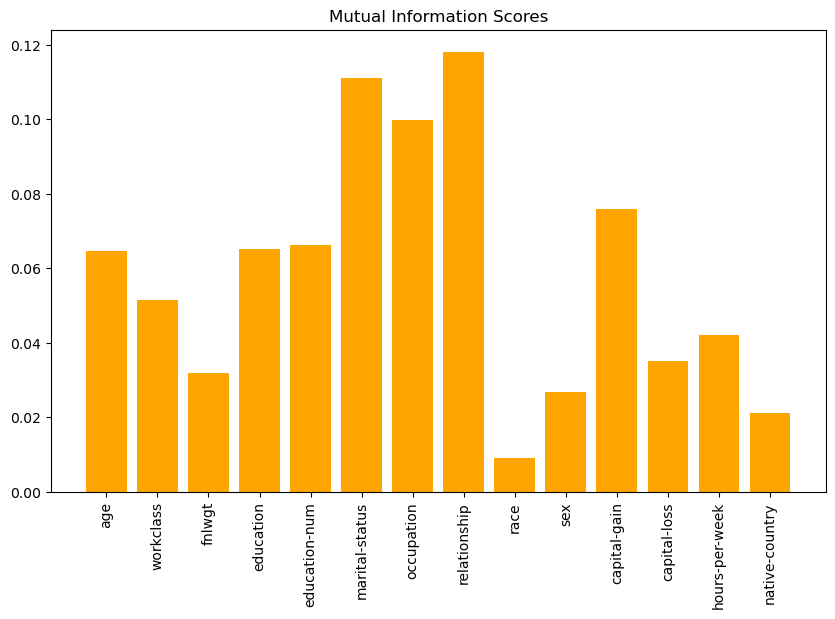

In [26]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information
mi_scores = mutual_info_classif(X_encoded, y)

# Plot results
plt.figure(figsize=(10, 6))
plt.bar(X_encoded.columns, mi_scores, color='orange')
plt.xticks(rotation=90)
plt.title("Mutual Information Scores")
plt.show()


C:\Users\khour\miniconda3\envs\cs178\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


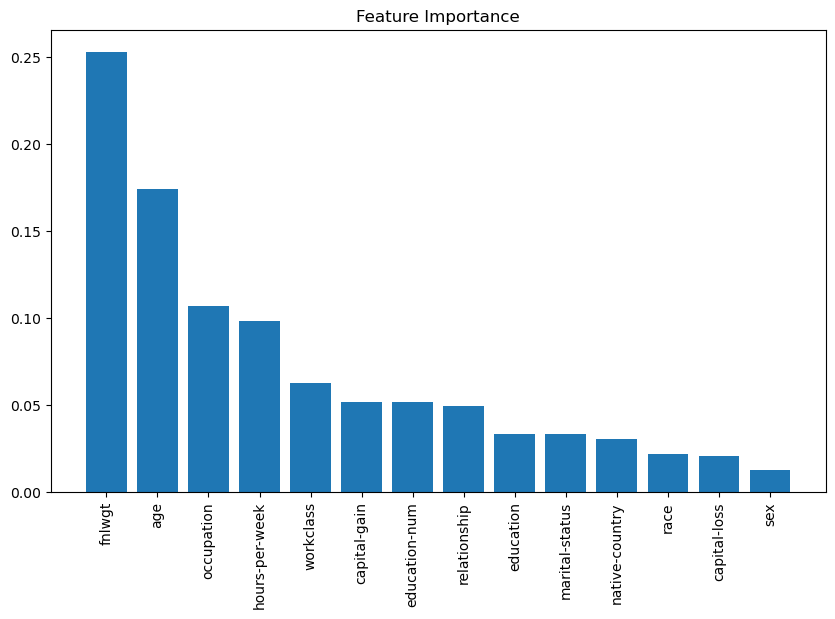

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
X_encoded = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_encoded, y)

# Plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), X_encoded.columns[indices], rotation=90)
plt.title("Feature Importance")
plt.show()
